In this notebook, we will use classification algorithms to predict the number of rented bikes for a given day

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

seed=99
random.seed(seed)
np.random.seed(seed)

# Feature Engineering

Loading data from data_cleaning notebook:

In [2]:
rental = pd.read_csv('data/rental.csv')

In [3]:
rental.head()

,instant,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0.24,0.2879,0.81,0.0,16,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,0.22,0.2727,0.80,0.0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,0.22,0.2727,0.80,0.0,32,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,0.24,0.2879,0.75,0.0,13,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,0.24,0.2879,0.75,0.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


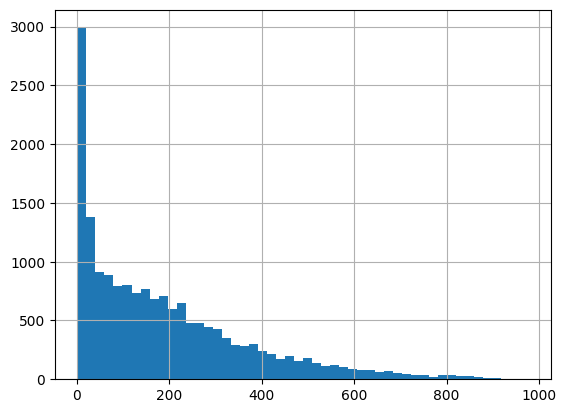

In [4]:
hist = rental['cnt'].hist(bins=50)

In [5]:
labels = ['<50', '[50-100)', '[100-200)', '[200-400)', '[400-600)', '>600']
bins = [0,50,100,200,400,600, float('inf')]
rental['cnt_bins'] = pd.cut(rental['cnt'],bins=bins,labels=labels)

In [6]:
rental = rental.drop(columns=['cnt'])

In [7]:
rental.head()

,instant,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,year_0,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,cnt_bins
0,1,0.24,0.2879,0.81,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,<50
1,2,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,<50
2,3,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,<50
3,4,0.24,0.2879,0.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,<50
4,5,0.24,0.2879,0.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,<50


# Predictive modeling

In [8]:
from sklearn.model_selection import train_test_split

X = rental.loc[:, rental.columns != 'cnt_bins']
y = rental['cnt_bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Method 1: Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
train_score = clf.score(X_train, y_train)
print(f'Predictive score on training data {train_score:.4f}')
test_score = clf.score(X_test, y_test)
print(f'Predictive score on test data {test_score:.4f}')

Predictive score on training data 0.4577
Predictive score on test data 0.4727


In [10]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(penalty='l1', solver='liblinear')
param_grid = {'C':range(0,10,0.1)}
grid_search = GridSearchCV(clf, param_grid, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
train_score = clf.score(X_train, y_train)
print(f'Predictive score on training data {train_score:.4f}')
test_score = clf.score(X_test, y_test)
print(f'Predictive score on test data {test_score:.4f}')

Predictive score on training data 0.6086
Predictive score on test data 0.6079


### Method 2: K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
train_score = knn.score(X_train, y_train)
print(f'Predictive score on training data {train_score:.4f}')
test_score = knn.score(X_test, y_test)
print(f'Predictive score on test data {test_score:.4f}')

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_tuned = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,15), 'p':range(1,3)}
grid_search = GridSearchCV(knn_tuned, param_grid, return_train_score=True)
grid_search.fit(X_train, y_train)
test_accuracy = grid_search.cv_results_['mean_test_score'].mean()
train_accuracy = grid_search.cv_results_['mean_train_score'].mean()

print(f'Predictive score on training data {train_accuracy:.4f}')
print(f'Predictive score on test data {test_accuracy:.4f}')

### Method 3: Random Forests

### Method 4: Neural Networks